## Neural Network

First we read and visualise the dataframe

In [322]:
import pandas as pd

input_df = pd.read_csv("Dataset4.csv",sep=";")

In [323]:
input_df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12941,35,management,married,tertiary,no,1361,no,yes,cellular,7,jul,15,11,-1,0,unknown,no
34017,31,management,single,tertiary,no,2016,no,no,cellular,30,apr,209,1,-1,0,unknown,yes
30525,30,technician,married,secondary,no,436,yes,no,cellular,5,feb,138,3,206,8,other,no
38721,33,blue-collar,married,secondary,no,-63,yes,no,cellular,15,may,126,2,350,1,failure,no
14153,29,management,single,tertiary,no,983,yes,no,cellular,11,jul,963,2,-1,0,unknown,yes


In [324]:
input_df = input_df.dropna(axis=0)  # there are not nan but it is good in general to check them

C:\Users\volpe\AppData\Local\Temp\ipykernel_11364\2253444957.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count, f'({class_proportions[i]:.2%})', ha='center', va='bottom')


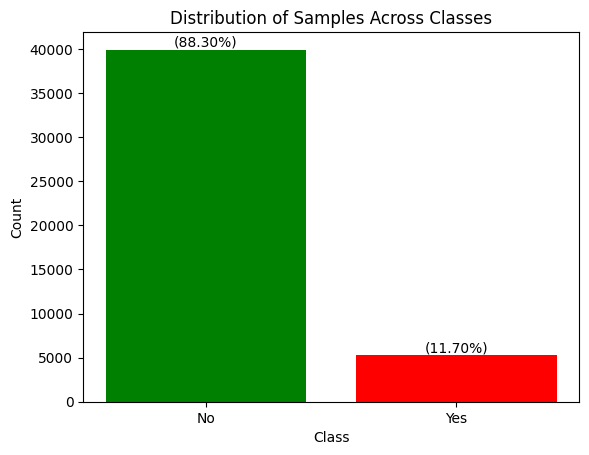

In [325]:
import matplotlib.pyplot as plt

# Assuming 'y' is the name of your target variable containing "yes" and "no" values

# Count the occurrences of each class
class_counts = input_df['y'].value_counts()

# Calculate proportions
total_samples = class_counts.sum()
class_proportions = class_counts / total_samples

# Plot the distribution
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Samples Across Classes')
plt.xticks(class_counts.index, ['No', 'Yes'])  # Replace with appropriate labels

# Add text annotations for count and proportion
for i, count in enumerate(class_counts):
    plt.text(i, count, f'({class_proportions[i]:.2%})', ha='center', va='bottom')

plt.show()


Now we have to find a numerical representation of the cathegorical variables.\
The default, housing, loan variables we use a binary representation.\
For the job and marital variables we use a one hot encoding.\
For the education variable we use an ordinal representation

Here we discretize the age variable

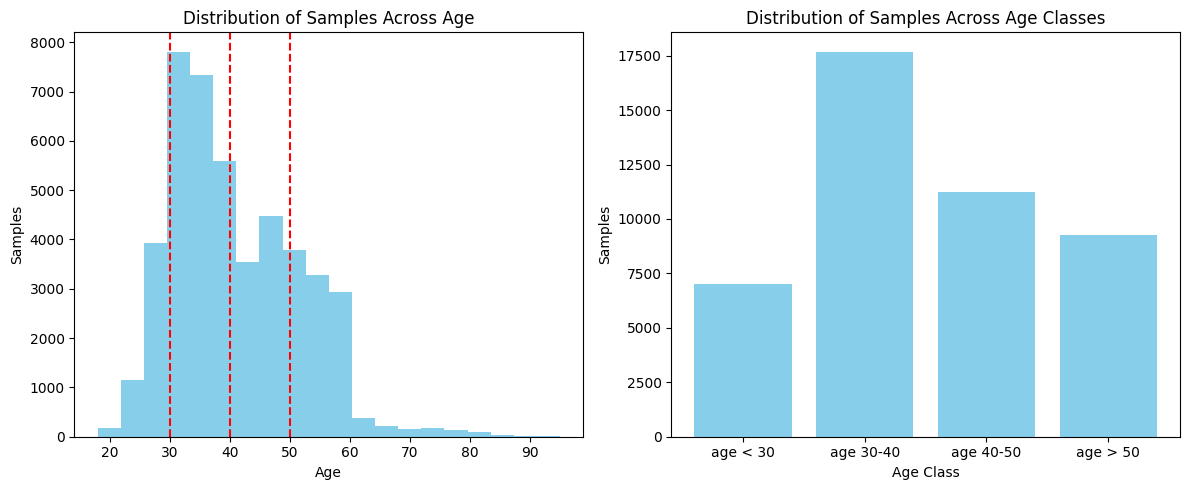

In [326]:

import matplotlib.pyplot as plt
# Define age thresholds
thresholds = [0, 30, 40, 50, float('inf')]  # Add float('inf') to include ages greater than 50

# Create column for each class and populate with 0 or 1
input_df['age_class'] = pd.cut(input_df['age'], 
                               bins=thresholds, 
                               labels=["age < 30", "age 30-40", "age 40-50", "age > 50"])

# Convert to dummy variables
age_dummies = pd.get_dummies(input_df['age_class'])

# Convert boolean values to integers (0 and 1)
age_dummies = age_dummies.astype(int)

# Concatenate dummy variables with the original DataFrame
input_df = pd.concat([input_df, age_dummies], axis=1)

# Calculate the count of samples in each age class
class_counts = input_df[['age < 30', 'age 30-40', 'age 40-50', 'age > 50']].sum()

#______________________________________________________ Plot

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of samples across age
ages = input_df["age"].to_numpy()
axs[0].hist(ages, bins=20, color="skyblue")
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Samples')
axs[0].set_title('Distribution of Samples Across Age')

# Add threshold lines and class labels to the first plot
threshold = [30, 40, 50]
classes = ["age < 30", "age 30-40", "age 40-50", "age > 50"]
for value in threshold:
    axs[0].axvline(x=value, color='r', linestyle='--')

# Plotting the distribution of samples across age classes
class_counts = input_df[['age < 30', 'age 30-40', 'age 40-50', 'age > 50']].sum()
axs[1].bar(class_counts.index, class_counts.values, color='skyblue')
axs[1].set_xlabel('Age Class')
axs[1].set_ylabel('Samples')
axs[1].set_title('Distribution of Samples Across Age Classes')

# Show the plots
plt.tight_layout()
plt.show()

input_df.drop(columns=['age'], inplace=True)
input_df.drop(columns=['age_class'], inplace=True)

Here we discretize the balance variable

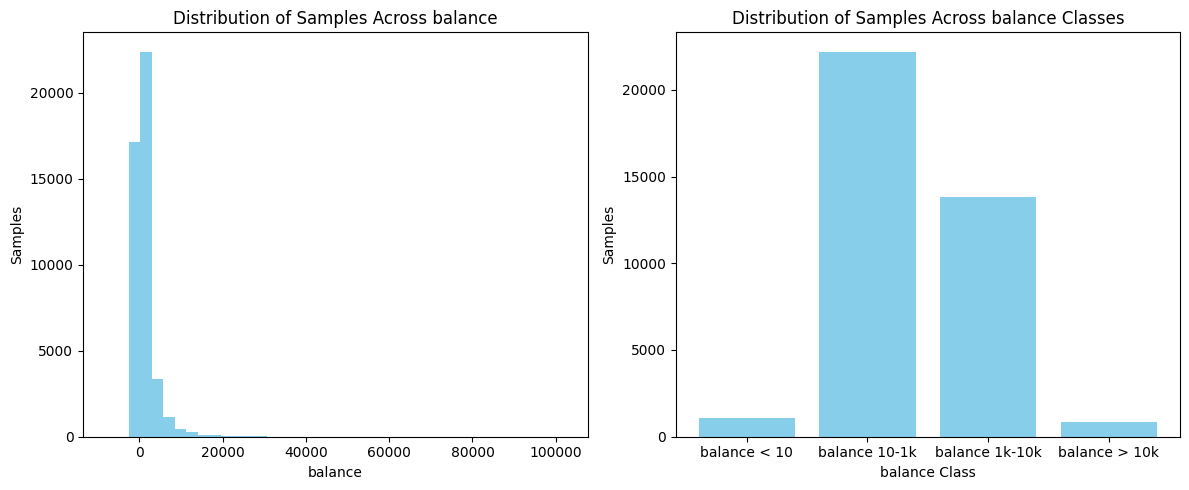

In [327]:

import matplotlib.pyplot as plt
# Define balance thresholds
thresholds = [0,10, 1000, 10000, float('inf')]  # Add float('inf') to include balances greater than 50


# Create column for each class and populate with 0 or 1
col = ["balance < 10", "balance 10-1k","balance 1k-10k", "balance > 10k"]
input_df['balance_class'] = pd.cut(input_df['balance'], 
                               bins=thresholds, 
                               labels=col)

# Convert to dummy variables
balance_dummies = pd.get_dummies(input_df['balance_class'])

# Convert boolean values to integers (0 and 1)
balance_dummies = balance_dummies.astype(int)

# Concatenate dummy variables with the original DataFrame
input_df = pd.concat([input_df, balance_dummies], axis=1)

# Calculate the count of samples in each balance class
class_counts = input_df[col].sum()

#______________________________________________________ Plot

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of samples across balance
balances = input_df["balance"].to_numpy()
axs[0].hist(balances, bins=40, color="skyblue")
axs[0].set_xlabel('balance')
axs[0].set_ylabel('Samples')
axs[0].set_title('Distribution of Samples Across balance')



# Plotting the distribution of samples across balance classes
class_counts = input_df[col].sum()
axs[1].bar(class_counts.index, class_counts.values, color='skyblue')
axs[1].set_xlabel('balance Class')
axs[1].set_ylabel('Samples')
axs[1].set_title('Distribution of Samples Across balance Classes')

# Show the plots
plt.tight_layout()
plt.show()

input_df.drop(columns=['balance'], inplace=True)
input_df.drop(columns=['balance_class'], inplace=True)


Here we create dummies or binary encoding for the loan, housing, default, marital and job variable

In [328]:
# Define a mapping for 'yes' and 'no' to 1 and 0 respectively
mapping = {'yes': 1, 'no': 0}

# Apply mapping to the columns
input_df['loan']    = input_df['loan'].map(mapping)
input_df['housing'] = input_df['housing'].map(mapping)
input_df['default'] = input_df['default'].map(mapping)
input_df['y'] = input_df['y'].map(mapping)

In [329]:
#_______________________________________________________ Perform one-hot encoding on the 'marital' variable
marital_dummies = pd.get_dummies(input_df['marital'])

# Convert dummy variables to 0 and 1
marital_dummies = marital_dummies.astype(int)

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, marital_dummies], axis=1)

# Drop the original 'marital' column if needed
input_df.drop(columns=['marital'], inplace=True)
#_______________________________________________________ Perform one-hot encoding on the 'job' variable
job_dummies = pd.get_dummies(input_df['job'])

# Convert dummy variables to 0 and 1
job_dummies = job_dummies.astype(int)

# Add prefix "job-" to each column name
job_dummies = job_dummies.add_prefix('job-')

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, job_dummies], axis=1)

# Drop the original 'job' column if needed
input_df.drop(columns=['job'], inplace=True)

Here we encode the education, we assumed that people with unknown education are likely to have at least secondary education.
Reference: https://stats.stackexchange.com/questions/574761/what-is-this-one-hot-like-encoding-of-ordinal-variables-called-and-is-it-feasibl

In [330]:
# Define a function to map categories to binary vectors
def map_categories(category):
    if category == 'primary':
        return pd.Series([0, 0, 0])
    elif category == 'secondary':
        return pd.Series([1, 0, 0])
    elif category == 'unknown':
        return pd.Series([1, 1, 0])
    elif category == 'tertiary':
        return pd.Series([1, 1, 1])
    else:
        return None  # Handle unknown categories

# Apply the mapping function to the 'education' column and join the resulting Series to the DataFrame
input_df[['education_primary', 'education_secondary', 'education_tertiary']] = input_df['education'].apply(map_categories)

input_df.drop(columns='education', inplace=True)


Here we drop the last conctact day, cover the month to a number (assuming we are analasing the data in january the next year).\
Finally, we make a one hot encoding of the contact variable, dropping the variable unknown

In [331]:
# We drop the day of the month of the last contact
input_df.drop(columns='day', inplace=True)
#________________________________________________________________ Dummy rapresentation of months
# Perform one-hot encoding on the 'month' variable
month_dummies = pd.get_dummies(input_df['month'])

# Drop the dummy column for 'jan' if it exists
if 'jan' in month_dummies.columns:
    month_dummies.drop(columns='jan', inplace=True)

# Convert remaining dummy variables to 0 and 1
month_dummies = month_dummies.astype(int)

# Rename columns to include prefix 'month_'
month_dummies.columns = ['month_' + col for col in month_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, month_dummies], axis=1)

# Drop the original 'month' column
input_df.drop(columns=['month'], inplace=True)

#________________________________________________________________ Dummy rapresentation of contact
# Perform one-hot encoding on the 'contact' variable
contact_dummies = pd.get_dummies(input_df['contact'])

# Drop the 'unknown' dummy column if it exists
if 'unknown' in contact_dummies.columns:
    contact_dummies.drop(columns='unknown', inplace=True)

# Convert remaining dummy variables to 0 and 1
contact_dummies = contact_dummies.astype(int)

# Rename columns to include prefix 'contact_'
contact_dummies.columns = ['contact_' + col for col in contact_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, contact_dummies], axis=1)

# Drop the original 'contact' column
input_df.drop(columns=['contact'], inplace=True)


Here we encode the poutcome variable

In [332]:
# Perform one-hot encoding on the 'poutcome' variable
poutcome_dummies = pd.get_dummies(input_df['poutcome'])

# Convert remaining dummy variables to 0 and 1
poutcome_dummies = poutcome_dummies.astype(int)

# Rename columns to include prefix 'poutcome_'
poutcome_dummies.columns = ['poutcome_' + col for col in poutcome_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, poutcome_dummies], axis=1)

# Drop the original 'poutcome' column
input_df.drop(columns=['poutcome'], inplace=True)

# Drop the original 'poutcome_unknown' column
input_df.drop(columns=['poutcome_unknown'], inplace=True)


Now we visualize the dataset

In [333]:
input_df.iloc[:,0:10].sample(n=10)


,default,housing,loan,duration,campaign,pdays,previous,y,age < 30,age 30-40
3921,0,1,0,326,1,-1,0,0,1,0
41403,0,0,0,420,1,15,3,0,0,1
22568,0,0,0,112,3,-1,0,0,0,0
23585,0,0,0,359,7,-1,0,0,0,0
17708,0,0,1,114,4,-1,0,0,1,0
6575,0,0,1,189,7,-1,0,0,0,1
8969,0,0,0,308,1,-1,0,0,0,1
32341,0,1,1,102,2,149,5,0,0,0
13750,1,1,0,121,1,-1,0,0,0,1
23112,0,0,0,653,8,-1,0,0,0,0


In [334]:
input_df.iloc[:,10:20].sample(n=10)


,age 40-50,age > 50,balance < 10,balance 10-1k,balance 1k-10k,balance > 10k,divorced,married,single,job-admin.
5814,0,0,0,1,0,0,0,1,0,0
31531,0,1,0,0,1,0,0,1,0,0
32124,0,0,0,0,0,0,0,0,1,0
20479,0,0,0,1,0,0,0,0,1,0
10340,0,1,0,1,0,0,0,1,0,0
26263,0,0,0,0,0,0,0,1,0,0
40927,0,0,0,1,0,0,0,0,1,0
40657,0,1,0,0,1,0,0,1,0,0
25307,0,0,0,1,0,0,0,1,0,0
8915,1,0,0,0,1,0,1,0,0,1


In [335]:
input_df.iloc[:,20:30].sample(n=10)

,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed
43489,0,0,0,1,0,0,0,0,0,0
20520,0,0,0,1,0,0,0,0,0,0
27294,0,0,0,0,0,0,0,0,1,0
11761,0,0,0,0,0,0,0,0,0,0
15954,0,0,0,0,0,0,0,0,1,0
13991,0,0,0,0,0,0,1,0,0,0
24006,0,0,0,0,0,0,0,0,1,0
42004,0,0,0,0,0,0,0,0,1,0
32757,1,0,0,0,0,0,0,0,0,0
8244,0,0,0,1,0,0,0,0,0,0


In [336]:
input_df.iloc[:,30:40].sample(n=10)

,job-unknown,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jul,month_jun
44089,0,1,0,0,0,0,0,0,1,0
43072,0,1,0,0,0,0,0,1,0,0
16266,0,1,1,1,0,0,0,0,1,0
13561,0,0,0,0,0,0,0,0,1,0
30116,0,1,1,1,0,0,0,1,0,0
37859,0,0,0,0,0,0,0,0,0,0
28068,0,1,0,0,0,0,0,0,0,0
35286,0,1,1,1,0,0,0,0,0,0
9820,0,1,0,0,0,0,0,0,0,1
14962,0,1,0,0,0,0,0,0,1,0


In [337]:
input_df.iloc[:,40:].sample(n=10)

,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
39208,0,1,0,0,0,1,0,0,1,0
26911,0,0,1,0,0,1,0,0,0,0
23680,0,0,0,0,0,1,0,0,0,0
35679,0,1,0,0,0,1,0,0,0,0
7365,0,1,0,0,0,0,0,0,0,0
22988,0,0,0,0,0,1,0,0,0,0
16060,0,0,0,0,0,1,0,0,0,0
33149,0,0,0,0,0,1,0,1,0,0
44218,0,0,0,0,0,1,0,0,0,1
10075,0,0,0,0,0,0,0,0,0,0


It is ready to be processed by a neural network!

In [338]:
from sklearn.model_selection import train_test_split

X = input_df.drop(columns=['y']).to_numpy()
Y = input_df["y"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.20, random_state=42)

In [339]:
x_train[0,:]

array([  1,   1,   0, 278,   1,  -1,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   1,   0,   0,   0,   0], dtype=int64)

In [340]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [341]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.metrics import precision_score

threshold = 0.5
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=x_train[0].shape), # Input layer
    Dense(32, activation='relu'),                               # Hidden layer
    Dense(1, activation='sigmoid')                              # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_val, y_val)
y_pred = model.predict(x_val)
y_pred_binary = (y_pred > threshold).astype(int)
precision = precision_score(y_val, y_pred_binary, pos_label=1)

print(precision)
'''
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'''

Epoch 1/10


C:\Users\volpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


724/724 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8153 - loss: 1.3518 - val_accuracy: 0.8934 - val_loss: 0.2806
Epoch 2/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8859 - loss: 0.3477 - val_accuracy: 0.8889 - val_loss: 0.3141
Epoch 3/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.8784 - loss: 0.3784 - val_accuracy: 0.8882 - val_loss: 0.2671
Epoch 4/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.8874 - loss: 0.3144 - val_accuracy: 0.8799 - val_loss: 0.3630
Epoch 5/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8885 - loss: 0.2931 - val_accuracy: 0.8842 - val_loss: 0.3924
Epoch 6/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.8858 - loss: 0.3172 - val_accuracy: 0.8896 - val_loss: 0.2814
Epoch 7/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8921 - loss: 0.2757 - val_accuracy: 0.8820 - val_loss: 0.2872
Epoch 8/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8928 - loss: 0.2666 - val_accuracy:

"\n# Visualize training history\nimport matplotlib.pyplot as plt\n\nplt.plot(history.history['loss'], label='Training Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n\nplt.plot(history.history['accuracy'], label='Training Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()\n\n"

In [342]:
print(y_val)

[0 0 1 ... 0 0 0]


In [343]:
x_train.shape[1]

49

In [344]:
val_accuracy

0.8877522945404053

Now we create some architechtures and choose the one with the highest accuracy

In [366]:
def create_m1(epo,bat,c,x,y):
    model = Sequential([
    Dense(100, activation='relu', input_dim=c), # Input layer
    Dense(100, activation='relu'),                               # Hidden layer
    Dense(100, activation='relu'),                               # Hidden layer
    Dense(100, activation='relu'),                               # Hidden layer
    Dense(1, activation='sigmoid')                              # Output layer
    ])
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

def create_m1(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=c))
    model.add(Dense(units=100, activation='tanh'))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],                                    # tf.keras.losses.CategoricalCrossentropy should be more appropriate but I cannot make it work
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model
def create_m2(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

def create_m3(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=300, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model
def create_m4(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=1000, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

Since the accuracy is not suitable for this task we select the neural network that shows the highest precision in predicting class 1 (subscription)

In [ ]:
from sklearn.metrics import precision_score
threshold = 0.5
fun_lst =  [create_m1,create_m2,create_m3,create_m4]
epo_list = [1,3, 5,20,100]

batch_size_list = [5,8,10,20]
best_performance = -1
c = x_train.shape[1]
# 80 models will be trained
for function in fun_lst:
    for epo in epo_list:
        for bat in batch_size_list:
            model = function(epo,bat,c,x_train, y_train)
            y_pred = model.predict(x_val)
            y_pred_binary = (y_pred > threshold).astype(int)
            precision = precision_score(y_val, y_pred_binary, pos_label=1)
            if precision > best_performance:
                best_performance = precision
                opt_model, opt_fun, opt_epo, opt_bat = model, function, epo, bat

In [371]:
print("Highest precision: ",best_performance,\
      "Optimal model: ",opt_fun, \
      "Optimal number of epoch: ",opt_epo,\
      "Optimal batch size: ", opt_bat,sep="\n")
predictions = opt_model.predict(x_val)

Highest precision: 
0.4075165806927045
Optimal model: 
<function create_m2 at 0x000001829CF19620>
Optimal number of epoch: 
3
Optimal batch size: 
5
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


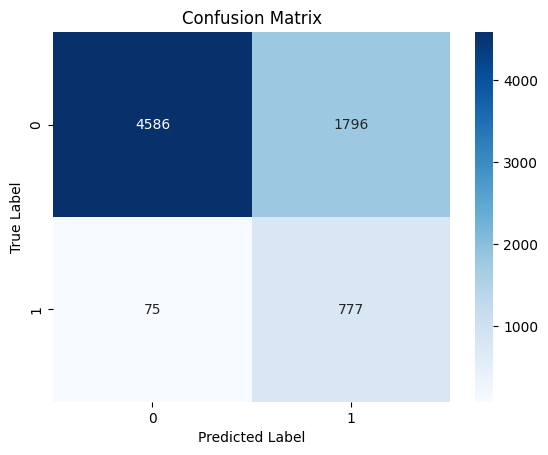

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8904 - loss: 0.2443


In [372]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming opt_model is your optimal model
y_pred = model.predict(x_val)
y_pred_binary = (y_pred > threshold).astype(int)

# Assuming y_val contains binary labels (0 and 1)
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

val_loss, val_accuracy = model.evaluate(x_val, y_val)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


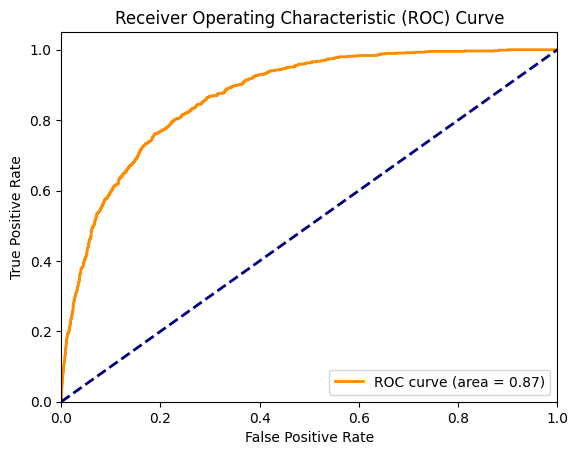

In [370]:
from sklearn.metrics import roc_curve, auc

# Assuming opt_model is your optimal model
y_pred_proba = opt_model.predict(x_val)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
